# Pre-requisites

In [ ]:
from IPython.display import clear_output

!pip install --upgrade tensorflow
!pip install --upgrade keras

clear_output()
print("Tensorflow and Keras are Updated.")

Tensorflow and Keras are Updated.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
inception_model = tf.keras.models.load_model('/content/drive/MyDrive/ARLP/ARLP_InceptionResNet.keras')
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/ARLP/ARLP_InceptionResNet.keras')

In [ ]:
# inception_model.summary()
# cnn_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(inception_model, to_file='ARLP_Inception_architecture.png', show_shapes=True, show_layer_names=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171325 to fit



In [ ]:
plot_model(cnn_model, to_file='ARLP_Custom_CNN_architecture.png', show_shapes=True, show_layer_names=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171325 to fit



# Upload

In [ ]:
from google.colab import files
import os

uploaded = files.upload()

for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

uploaded_file_path = os.path.abspath(filename)
print("Path of the uploaded file:", uploaded_file_path)

Saving 9.jpg to 9.jpg
Path of the uploaded file: /content/9.jpg


# Processing

### Inception Model Result:

In [ ]:
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/13.jpg'
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/14.jpg'
path = uploaded_file_path

def object_detection_inception(path):

    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))

    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    # Make predictions
    coords = inception_model.predict(test_arr)
    # coords = cnn_model.predict(test_arr)

    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image_inception, cods_inception = object_detection_inception(path)

fig = px.imshow(image_inception)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
(395, 281) (521, 306)


In [ ]:
# Cropping
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods_inception[0]
roi_inception = img[ymin:ymax,xmin:xmax]

fig = px.imshow(roi_inception)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))

### Custom CNN Model Result:

In [ ]:
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/13.jpg'
# path = '/content/drive/MyDrive/ARLP/ARLP Datasets ver-2/test/14.jpg'
path = uploaded_file_path

def object_detection_cnn(path):

    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))

    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    # Make predictions
    # coords = inception_model.predict(test_arr)
    coords = cnn_model.predict(test_arr)

    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image_cnn, cods_cnn = object_detection_cnn(path)

fig = px.imshow(image_cnn)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(395, 281) (521, 306)


In [ ]:
# Cropping
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods_cnn[0]
roi_cnn = img[ymin:ymax,xmin:xmax]

fig = px.imshow(roi_cnn)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))

# Results' Comparision of Both Models

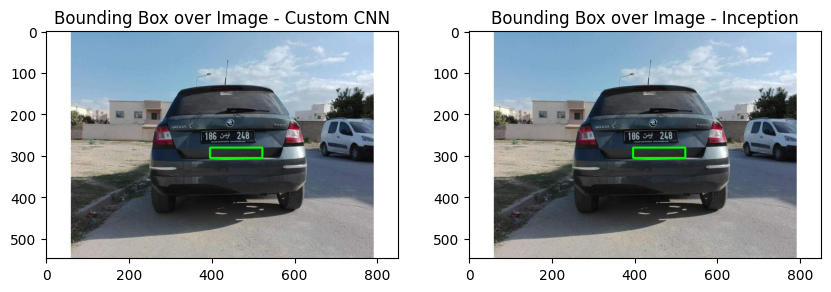

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_cnn)
axs[0].set_title('Bounding Box over Image - Custom CNN')

axs[1].imshow(image_inception)
axs[1].set_title('Bounding Box over Image - Inception')

plt.show()


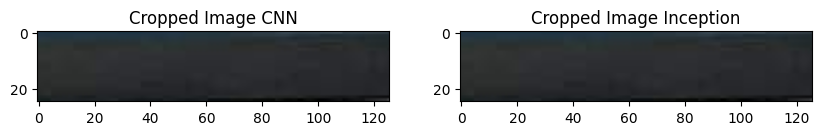

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(roi_cnn)
axs[0].set_title('Cropped Image CNN')

axs[1].imshow(roi_inception)
axs[1].set_title('Cropped Image Inception')

plt.show()

# License Number Recognition using OCR

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

!pip install easyocr

clear_output()
print("Installation of Pytesseract and Easyocr is completed.")

Installation of Pytesseract and Easyocr is completed.


In [ ]:
import cv2
import numpy as np
from PIL import Image

def process_image(image):
  image_array = np.array(image)
  image_resized = cv2.resize(image_array, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
  image_resized_pil = Image.fromarray(image_resized)
  image_resized_gray = image_resized_pil.convert("L")
  gaussian_blur_image = cv2.GaussianBlur(np.array(image_resized_gray), (5, 5), 0)
  blurred_image_pil = Image.fromarray(gaussian_blur_image)
  return blurred_image_pil

blurred_image = process_image(roi_inception)

fig = px.imshow(blurred_image)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))

### Result of Tesseract OCR

In [ ]:
import pytesseract

pytesseract_text = pytesseract.image_to_string(blurred_image)
print("Detected text:")
print(pytesseract_text)

Detected text:



In [ ]:
import pytesseract as pt

pytesseract_result = pt.image_to_string(roi_inception)
print(f"Result of Tesseract OCR: {pytesseract_result}")

Result of Tesseract OCR: 


### Result of EasyOCR

In [ ]:
import easyocr

reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
easyocr_reader_result = reader.readtext(roi_inception)

easyocr_text = []
for easyocr_result in easyocr_reader_result:
  easyocr_text.append(easyocr_result[0])  # Access the text string (0th element)

print(f"Result of EasyOCR: {easyocr_text}")

Result of EasyOCR: []


# Results' Comparision of both OCRs

In [ ]:
# Comparision between TesseractOCR and EasyOCR
print(f"Result of Tesseract OCR: {pytesseract_result}")
print(f"Result of EasyOCR: {easyocr_text}")

Result of Tesseract OCR: 
Result of EasyOCR: []
